In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import cartopy.crs as ccrs
%matplotlib inline

In [2]:
#f=plt.figure(figsize=(10,6));
#ax = plt.axes();

x = np.array([])
var = np.array([])

i = 0

#infile_prefix    = '/ihesp/archive/LR/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.001/ocn/hist/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.001.pop.h.'
infile_prefix    = '/ihesp/archive/LR/b.e13.B1950TRC5.ne30_g16.ihesp24_1950-2050.001/ocn/hist/b.e13.B1950TRC5.ne30_g16.ihesp24_1950-2050.001.pop.h.'
#yr 31 to 135

for yr in range(1950,2020):
#for yr in range(31,135):

    for month in range(1,13):

        yr_str = str(yr).zfill(4);
        month_str = str(month).zfill(2);

        infile    = infile_prefix+yr_str+'-'+month_str+'.nc'
        #print('opening file:'+infile)
        ds = xr.open_dataset(infile,chunks={'time':1,'z_t':1})
        #ds = xr.open_dataset(infile,chunks={'time':1})

        #lon = ds.TLONG.values
        #lat = ds.TLAT.values
        var = np.append(var,ds.TEMP.isel(time=0,z_t=0,nlat=200,nlon=200))
        x = np.append(x,i)
        i = i + 1

#var = ds.SST.isel(time=0).where(ds.TLONG>0,drop=True)

#lat = ds.TLAT.where(ds.TLONG>-1,drop=True)
#var = ds.TEMP.isel(time=0,z_t=0)


#ax1.pcolormesh(lon,lat,var,transform=ccrs.PlateCarree(),cmap='nipy_spectral');



#plt.colorbar()


#plt.show()
#f.savefig("foo.pdf", bbox_inches='tight')
#f.savefig('foo_'+yr+'_'+month+'.png', bbox_inches='tight', dpi=1200)


In [3]:
infile='/ihesp/archive/LR/b.e13.B1950TRC5.ne30_g16.ihesp24_1950-2050.001/ocn/hist/b.e13.B1950TRC5.ne30_g16.ihesp24_1950-2050.001.pop.h.1950-01.nc'

ds = xr.open_dataset(infile,chunks={'time':1,'z_t':1})
#ds.TEMP.isel(time=0,z_t=0,nlon=0,nlat=0)
print(ds['TLONG'].isel(nlon=0,nlat=0)>0)


<xarray.DataArray 'TLONG' ()>
dask.array<gt, shape=(), dtype=bool, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    ULONG    float64 dask.array<chunksize=(), meta=np.ndarray>
    ULAT     float64 dask.array<chunksize=(), meta=np.ndarray>
    TLONG    float64 dask.array<chunksize=(), meta=np.ndarray>
    TLAT     float64 dask.array<chunksize=(), meta=np.ndarray>


from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(var, model='additive', period=12)
result.plot()

In [4]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = sm.add_constant(x)
model = sm.OLS(var,X)
#model = sm.OLS(result.trend,X)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     13.56
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           0.000246
Time:                        09:05:37   Log-Likelihood:                -1269.3
No. Observations:                 840   AIC:                             2543.
Df Residuals:                     838   BIC:                             2552.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.4333      0.076    362.458      0.0

AttributeError: 'OLS' object has no attribute 'trend'

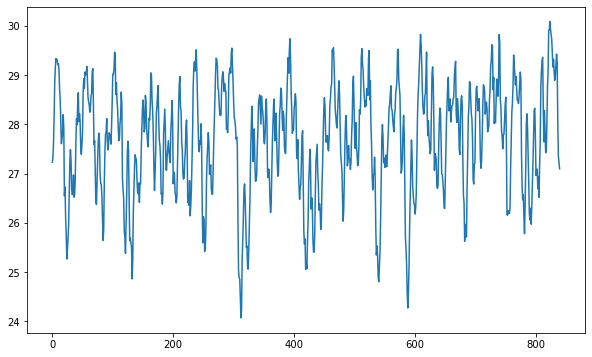

In [7]:
f=plt.figure(figsize=(10,6));
ax = plt.axes();
ax.plot(var)

tr = resultsa.trend
ax.plot(x, tr, 'r--.', label="OLS")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")

prstd, iv_l, iv_u = wls_prediction_std(results)

ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import STL
stl = STL(var, seasonal=13,period=12)
res = stl.fit()
fig = res.plot()
print(res.trend.shape)
print(x.shape)